# This notebook uses the new wrangle functions and will explore only beekeepers exclusive to state.

In [1]:
import pandas as pd
import numpy as np
import wrangle
import explore
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
df = wrangle.bee_merged()

In [3]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
0,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000,53,11.181818,1,32.806671,-86.791130
1,arkansas,2022,annual,18,51.254480,53.867865,152,143,136,94.444444,97.368421,-16,7.555556,5,34.969704,-92.373123
2,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.000000,100.000000,-19,7.588235,5,34.969704,-92.373123
3,california,2022,annual,89,33.269667,42.818791,166009,85526,171543,67.415730,25.320314,5534,1927.449438,6,36.116203,-119.681564
4,california,2022,annual,29,36.752854,35.811393,123975,73971,127295,0.000000,0.000000,3320,4389.482759,6,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.000000,100.000000,40,6.229508,53,47.400902,-121.490494
1044,west_virginia,2011,annual,25,78.585462,40.723147,193,400,109,92.000000,48.704663,-84,4.360000,54,38.491226,-80.954453
1045,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.000000,100.000000,0,4.086957,54,38.491226,-80.954453
1046,wisconsin,2011,annual,50,34.585065,51.882699,3773,2413,4564,92.000000,14.020673,791,91.280000,55,44.268543,-89.616508


In [4]:
df = df[df.beekeepers_exclusive_to_state == 100]

In [5]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
0,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.0,100.0,53,11.181818,1,32.806671,-86.791130
2,arkansas,2022,annual,17,49.411765,52.869897,148,126,129,100.0,100.0,-19,7.588235,5,34.969704,-92.373123
5,california,2022,annual,60,20.706772,46.205700,42034,11555,44248,100.0,100.0,2214,737.466667,6,36.116203,-119.681564
7,colorado,2022,annual,90,53.227771,40.620432,379,437,384,100.0,100.0,5,4.266667,8,39.059811,-105.311104
8,connecticut,2022,annual,28,33.862434,38.147562,88,64,125,100.0,100.0,37,4.464286,9,41.597782,-72.755371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,vermont,2011,annual,31,44.280443,41.199099,149,120,151,100.0,100.0,2,4.870968,50,44.045876,-72.710686
1041,virginia,2011,annual,167,40.861813,34.156246,760,550,796,100.0,100.0,36,4.766467,51,37.769337,-78.169968
1043,washington,2011,annual,61,36.026936,38.047901,340,214,380,100.0,100.0,40,6.229508,53,47.400902,-121.490494
1045,west_virginia,2011,annual,23,41.250000,36.881733,94,66,94,100.0,100.0,0,4.086957,54,38.491226,-80.954453


In [6]:
train, validate, test = explore.split_data(df)

In [7]:
train.shape, validate.shape, test.shape

((291, 16), (97, 16), (98, 16))

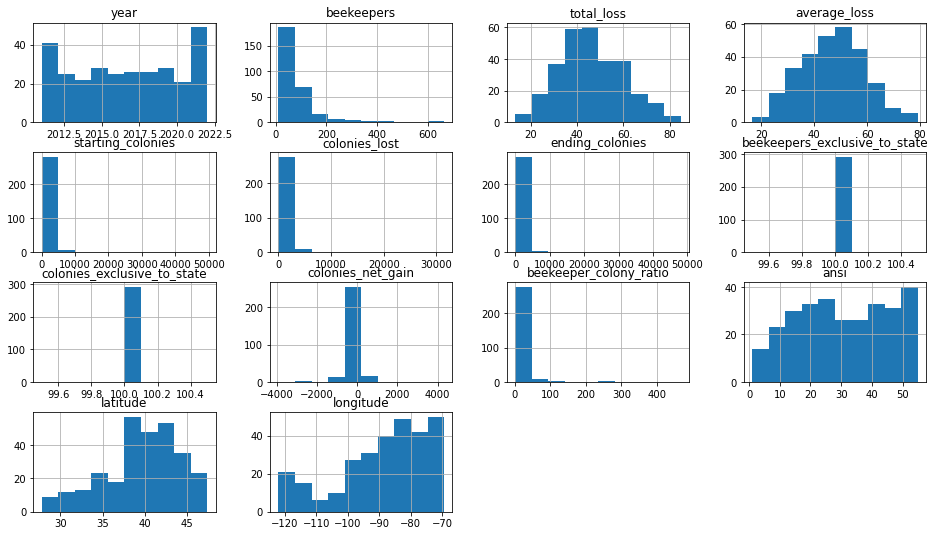

In [8]:
train.hist(figsize=[16,9])
plt.show()

## Does the beekeeper to hive ratio have an effect on colony loss? If so, does a higher beekeeper to hive ratio have less or more loss?

<Figure size 1152x648 with 0 Axes>

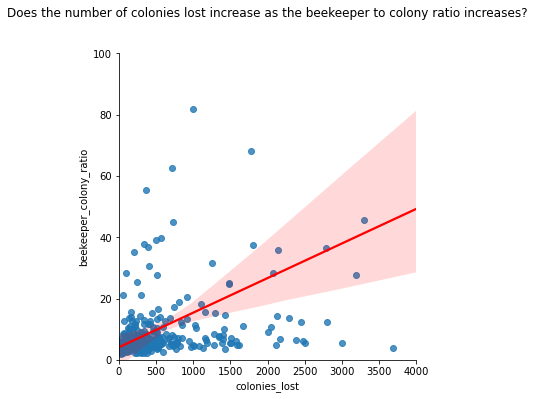

In [17]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
sns.lmplot(x='colonies_lost', y='beekeeper_colony_ratio', data=train, line_kws={'color': 'red'})
plt.xlim([0,4000])
plt.ylim([0,100])
plt.title('Does the number of colonies lost increase as the beekeeper to colony ratio increases?', y=1.1)
plt.show()

## Statistical test for correlation between colonies_lost and beekeeper_colony_ratio

- H0: There is no relationship between the number of colonies lost annually and the beekeeper to colony ratio.

- Ha: There is a relationship between the number of colonies lost annually and the beekeeper to colony ratio.

- Stats test: correlation (continuous & continuous)

In [34]:
corr, p = stats.pearsonr(train.beekeeper_colony_ratio, train.colonies_lost)
corr, p

(0.7650637965806383, 3.5116632381447964e-57)

### We can reject the null hypothesis that there is no relationship between the number of colonies lost annually and the beekeeper to colony ratio.

## How many colonies diminished over time? (State/Overall)

<AxesSubplot:title={'center':'Net colony loss / gain over time for all states'}, xlabel='year', ylabel='Colony change per year'>

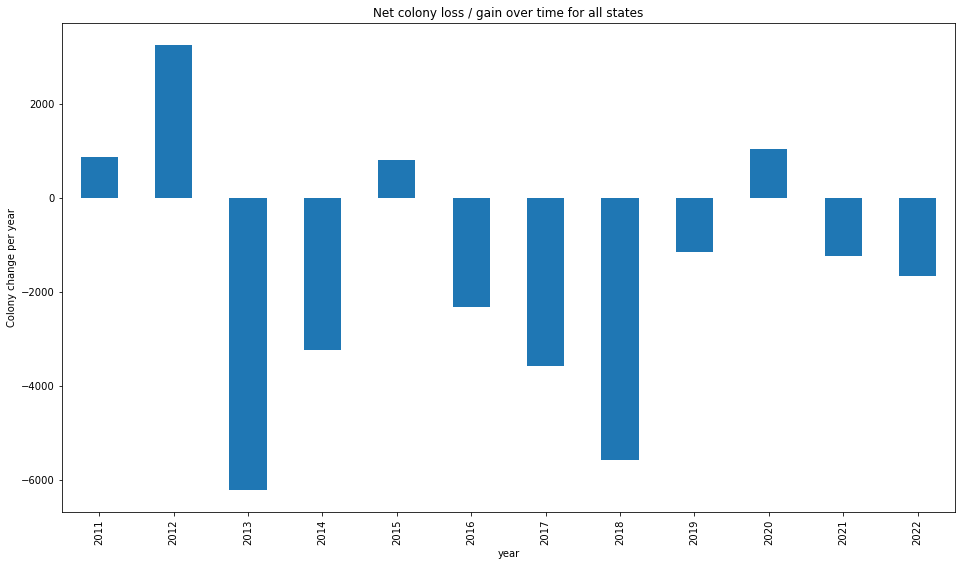

In [41]:
train.groupby('year').colonies_net_gain.sum().plot.bar(figsize=[16,9], title='Net colony loss / gain over time for all states',
                                                      ylabel='Colony change per year')

- Most years have a net loss in the overall number of colonies in the US.
- 2011, 2012, 2015, and 2020 showed net gains. What was happening during those years that affected colony loss?
- 2013 and 2018 saw a significant loss overall. What happened during those years?

## Which state suffered the heaviest loss? Which state has the least loss / highest gain?

<AxesSubplot:title={'center':'Cumulative colony loss / gain from 2011-2022 per states'}, ylabel='state'>

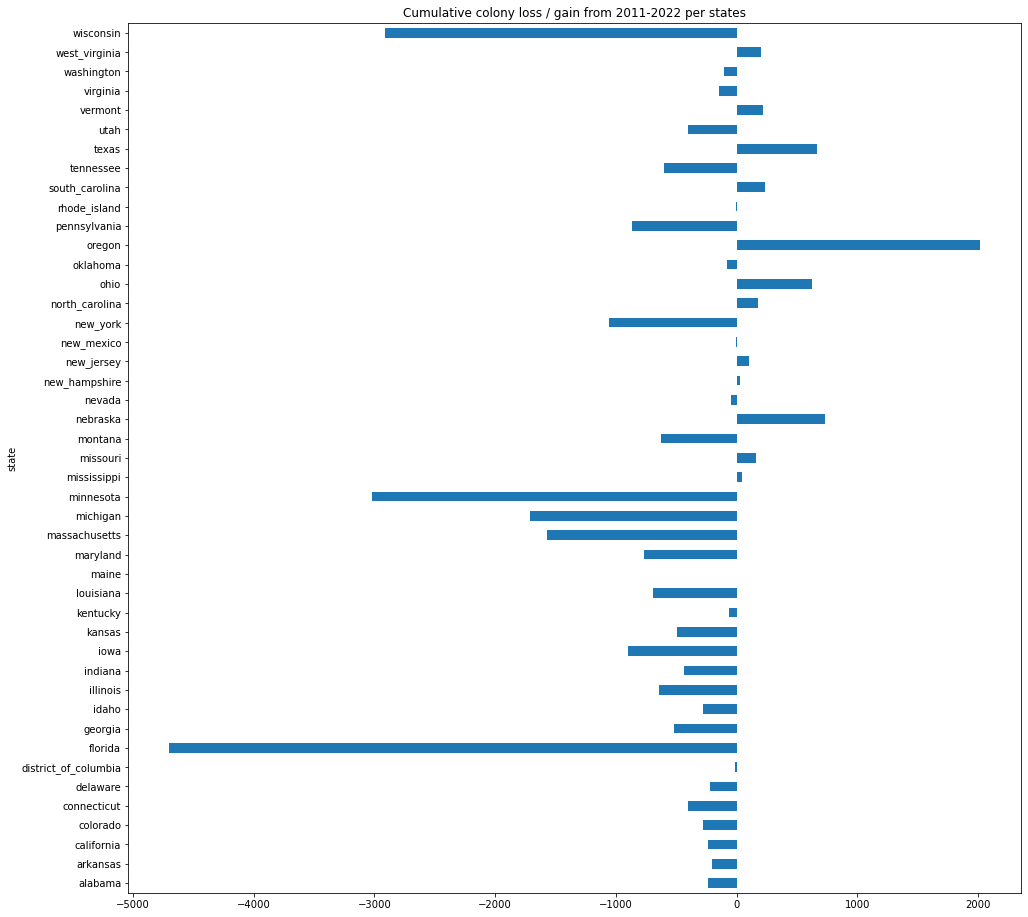

In [47]:
train.groupby(['state']).colonies_net_gain.sum().plot.barh(figsize=[16,16], title='Cumulative colony loss / gain from 2011-2022 per states',
                                                      ylabel='Net colony gain/loss')

In [48]:
train.groupby(['state']).colonies_net_gain.sum()

state
alabama                 -237
arkansas                -204
california              -236
colorado                -278
connecticut             -407
delaware                -221
district_of_columbia     -11
florida                -4703
georgia                 -520
idaho                   -276
illinois                -640
indiana                 -436
iowa                    -897
kansas                  -494
kentucky                 -62
louisiana               -696
maine                      1
maryland                -767
massachusetts          -1570
michigan               -1713
minnesota              -3021
mississippi               44
missouri                 156
montana                 -629
nebraska                 728
nevada                   -51
new_hampshire             28
new_jersey               101
new_mexico               -10
new_york               -1061
north_carolina           174
ohio                     626
oklahoma                 -84
oregon                  2018
pennsylv

- Florida has the highest net loss over time, followed by Minnesota. This may indicate that northern vs. southern locations may not play as much of a role as we initially thought.
- Pennsylvania has the highest net gain from 2011-2022. What are they doing right to keep increasing their colonies?